In [165]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [166]:
''' To pass with Grade 3
    Datapreprocessing
'''

# Load the data from all three files.
trail_1 = pd.read_csv('Trail1_extracted_features_acceleration_m1ai1-1.csv')
trail_2 = pd.read_csv('Trail2_extracted_features_acceleration_m1ai1.csv')
trail_3 = pd.read_csv('Trail3_extracted_features_acceleration_m2ai0.csv')

print(trail_1.shape)
print(trail_2.shape)
print(trail_3.shape)

(52, 19)
(49, 19)
(49, 22)


In [167]:
trail_1.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,start_time,event,axle
0,-0.000005,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188,0.000000,normal,normal
1,-0.000006,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911,2.886000,joint X,A1
2,0.000016,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875,3.385977,normal,normal
3,0.000067,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548,6.119000,squat A,A1
4,-0.000148,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984,6.618984,normal,normal


In [168]:
trail_2.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,start_time,event,axle
0,-0.000009,0.001330,0.004781,-0.005247,0.010028,-0.011314,-0.004142,0.001330,3.594038,0.000002,5601,475.0,6.991353e-08,1968.369558,2384.453288,0.277275,0.000000,normal,normal
1,-0.000001,0.024833,0.206107,-0.230497,0.436603,-0.353987,28.583506,0.024833,8.299628,0.000617,2376,400.0,2.548043e-05,390.360615,279.200266,0.002057,2.883000,joint X,A1
2,0.000001,0.003160,0.011216,-0.012437,0.023653,-0.022969,0.026897,0.003160,3.548914,0.000010,2524,475.0,3.956581e-07,664.000810,1209.615780,0.060962,3.382969,normal,normal
3,-0.000058,0.035265,0.388397,-0.440529,0.828926,-0.406542,46.475718,0.035266,11.013502,0.001244,1177,125.0,4.823977e-05,221.236299,241.947753,0.001156,5.866000,squat A,A1
4,0.000085,0.007067,0.026800,-0.023521,0.050321,0.213814,0.325838,0.007067,3.792151,0.000050,346,150.0,1.986305e-06,310.327261,604.510643,0.014122,6.365977,normal,normal


In [169]:
trail_3.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,...,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,start_time,event,axle,cluster,tsne_1,tsne_2
0,-0.000008,0.004723,0.016176,-0.014314,0.030491,0.010634,-0.648214,0.004723,3.425033,0.000022,...,8.894379e-07,330.918484,845.602327,0.024392,0.000000,normal,normal,0,-2.309560,4.035162
1,0.000039,0.038715,0.333258,-0.381299,0.714557,-0.584629,22.577204,0.038715,8.608034,0.001499,...,6.287941e-05,336.810570,261.285656,0.000855,3.499000,joint X,A1,1,0.431487,4.996733
2,-0.000028,0.007291,0.029070,-0.022543,0.051612,0.166879,0.081457,0.007291,3.987234,0.000053,...,2.153696e-06,286.508607,570.706370,0.012855,3.998984,normal,normal,0,-2.074971,4.288394
3,-0.000065,0.035973,0.346182,-0.354601,0.700783,0.031652,26.460765,0.035974,9.623257,0.001294,...,5.517608e-05,211.770122,216.868941,0.000879,6.812000,squat A,A1,1,0.026488,5.283027
4,0.000254,0.014505,0.041721,-0.042592,0.084313,-0.130408,-0.435783,0.014507,2.875974,0.000210,...,8.076040e-06,217.224459,530.742319,0.003934,7.311992,normal,normal,0,-2.132229,5.244460


In [170]:
''' Datapreprocessing continued...'''

# Combine the three datasets into a single unified dataset.
trail_df = pd.concat([trail_1, trail_2, trail_3], ignore_index=True)
print("before", trail_df.shape)

# Remove the columns start_time, axle, cluster, tsne_1, and tsne_2 from the dataset.
trail_df.drop(columns=['start_time', 'axle', 'cluster', 'tsne_1', 'tsne_2'], inplace=True)
print("after",trail_df.shape)

# Replace all normal events with 0 and all the other events with 1.
print("unique events:", trail_df['event'].unique())

trail_df['event'] = trail_df['event'].replace({'normal': 0, 'joint X': 1, 'squat A': 1, 'squat B': 1, 'squat C': 1, 'squat D': 1, 'squat E': 1, 'squat F': 1, 'squat G': 1, 'squat H': 1, 'squat I': 1, 'squat J': 1, 'crossing': 1, 'joint Y': 1, 'joint Z': 1, 'squat K': 1})
print(trail_df['event'])
#trail_df['defective'] = trail_df['event'].apply(lambda x: 0 if x == 'normal' else 1)



before (150, 22)
after (150, 17)
unique events: ['normal' 'joint X' 'squat A' 'squat B' 'squat C' 'squat D' 'squat E'
 'squat F' 'squat G' 'squat H' 'crossing' 'squat I' 'squat J' 'joint Y'
 'joint Z' 'squat K']
0      0
1      1
2      0
3      1
4      0
      ..
145    0
146    1
147    0
148    0
149    0
Name: event, Length: 150, dtype: int64


C:\Users\natal\AppData\Local\Temp\ipykernel_28484\733882907.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trail_df['event'] = trail_df['event'].replace({'normal': 0, 'joint X': 1, 'squat A': 1, 'squat B': 1, 'squat C': 1, 'squat D': 1, 'squat E': 1, 'squat F': 1, 'squat G': 1, 'squat H': 1, 'squat I': 1, 'squat J': 1, 'crossing': 1, 'joint Y': 1, 'joint Z': 1, 'squat K': 1})


In [171]:
print(trail_df['event'].value_counts())
print(trail_df[['event']].head(30))

event
1    90
0    60
Name: count, dtype: int64
    event
0       0
1       1
2       0
3       1
4       0
5       1
6       1
7       1
8       0
9       1
10      0
11      1
12      1
13      0
14      1
15      0
16      1
17      1
18      0
19      1
20      0
21      1
22      0
23      1
24      0
25      1
26      0
27      1
28      0
29      1


In [172]:
trail_df.head()

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,event
0,-0.000005,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188,0
1,-0.000006,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911,1
2,0.000016,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875,0
3,0.000067,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548,1
4,-0.000148,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984,0


In [173]:
''' Data Transformation '''

# Normalize the dataset

# Drop target column 'event'
X = trail_df.drop(columns=['event'])
#X = trail_df.drop(columns=['defective','event'])
# # label target 'event' to be y
y = trail_df['event']
#y = trail_df['defective']

# normalize only the features
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


In [174]:
X

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness
0,-4.765466e-06,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188
1,-5.524224e-06,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911
2,1.592743e-05,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875
3,6.701540e-05,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548
4,-1.478153e-04,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.331390e-05,0.004245,0.011402,-0.018020,0.029422,-0.444835,1.444451,0.004245,2.686071,0.000018,200,75.0,4.006007e-07,430.457208,1238.643555,0.044769
146,-1.099413e-05,0.005241,0.040248,-0.028953,0.069201,0.107682,4.440798,0.005241,7.679848,0.000027,1986,75.0,1.144510e-06,239.079103,749.173442,0.019725
147,3.509744e-07,0.003042,0.010449,-0.012557,0.023006,-0.204318,0.457160,0.003042,3.435312,0.000009,2702,50.0,3.798066e-07,411.447181,1277.321414,0.053086
148,-1.468078e-05,0.002244,0.009144,-0.009182,0.018326,0.020199,0.434172,0.002244,4.075170,0.000005,3689,75.0,2.051207e-07,708.029423,1682.923031,0.096123


In [175]:
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness
0,-0.059967,-1.019228,-0.733444,0.792603,-0.770579,-0.128277,-0.789381,-1.019258,-0.499059,-0.597595,2.356354,1.364456,-0.593623,2.094233,2.310511,2.269102
1,-0.071324,0.120304,-0.006849,-0.153409,0.069830,-0.190314,0.523937,0.120289,0.341908,-0.198973,0.648846,0.727356,-0.179108,-0.363358,-0.645454,-0.416390
2,0.249758,-0.935710,-0.712978,0.759404,-0.743769,-0.232595,-0.802611,-0.935738,-0.804260,-0.592611,0.528309,1.364456,-0.588807,0.138123,0.749724,0.224359
3,1.014427,0.102575,0.285369,-0.315210,0.303085,1.806071,1.186957,0.102564,1.277651,-0.210639,-0.263463,-1.183945,-0.199323,-0.499458,-0.555760,-0.410109
4,-2.201093,-0.686878,-0.673544,0.651610,-0.671118,-0.763409,-0.752020,-0.686837,-1.154555,-0.555040,-0.712477,-1.183945,-0.557077,-0.529369,-0.220996,-0.317040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.659670,-0.875860,-0.719932,0.746526,-0.741307,-0.983272,-0.740656,-0.875878,-1.251034,-0.586682,-0.841583,-1.183945,-0.588062,-0.244871,0.700970,0.006319
146,-0.153195,-0.826538,-0.618976,0.703945,-0.667101,0.090248,-0.590495,-0.826566,0.043290,-0.580317,0.178695,-1.183945,-0.575535,-0.537130,0.029574,-0.240693
147,0.016615,-0.935439,-0.723268,0.767803,-0.753276,-0.515956,-0.790134,-0.935468,-1.056840,-0.592589,0.587720,-1.343220,-0.588413,-0.273902,0.754024,0.088355
148,-0.208376,-0.974955,-0.727836,0.780948,-0.762008,-0.079728,-0.791286,-0.974983,-0.890997,-0.595431,1.151558,-1.183945,-0.591354,0.179017,1.310379,0.512833


In [176]:
''' Task to pass with Grade 4
    Model Training
'''

# Dataset splitting
# Split the data into training and testing sets in an 80/20 ratio.
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size=0.2, random_state = 30)

# SVM Model
svm_model = SVC()

# Cross Validation
# Perform k-fold cross-validation (e.g., 5-fold) on the training set to evaluate model stability.
cross_val = cross_val_score(svm_model, train_X, train_y, cv=5)

# Comparison task
# Compare between the 80/20 train-test split and k-fold cross-validation using SVM (Support Vector Machine).  
# Train an SVM model using both methods and evaluate its performance. 
# Discuss the differences in accuracy, consistency of results, and generalization ability.

# train on training set
svm_model.fit(train_X, train_y)

# test on test set
split_score = svm_model.score(test_X, test_y)

In [177]:
cross_val

array([0.91666667, 1.        , 1.        , 1.        , 0.91666667])

In [178]:
cross_val.mean()

np.float64(0.9666666666666666)

In [179]:
split_score

1.0

Compare between the 80/20 train-test split and k-fold cross-validation using SVM:
Both evaluation methods produced consistently high accuracy scores, confirming that the SVM model performs well on this dataset. However, the train-test split can be slightly more variable depending on how the data is randomly partitioned. In contrast, k-fold cross-validation provides a more stable and reliable estimate of model performance by averaging results across multiple folds

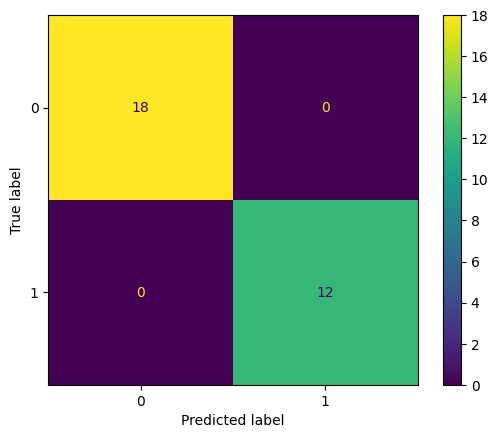

In [180]:

y_pred = svm_model.predict(test_X)
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [181]:
''' 
Task to pass with Grade 5
feature selection 
'''

# Research and understand various feature selection techniques
#Filtermethods
#Wrapper methods
#Embedded methods

#implement at least 4 feature selection algorithms, applying them to the dataset.

# Pearsons Correlation
# using non-normalized data
X_pearson_corr = trail_df.copy()
# sorted list of features by correlation w target
pearson_corr_matrix = X_pearson_corr.corr()
corr_w_target = pearson_corr_matrix['event'].drop('event').abs().sort_values(ascending=False) # don't compare event w itself

In [182]:
X_pearson_corr

,mean,std,max,min,range,skewness,kurtosis,rms,crest_factor,variance,zero_crossings,dominant_freq,spectral_energy,spectral_centroid,spectral_bandwidth,spectral_flatness,event
0,-4.765466e-06,0.001350,0.007542,-0.006189,0.013731,-0.004788,0.472182,0.001350,5.587349,0.000002,5798,475.0,7.037723e-08,1962.160093,2412.052659,0.274188,0
1,-5.524224e-06,0.024360,0.215148,-0.249093,0.464241,-0.036717,26.678484,0.024360,8.831983,0.000593,2809,375.0,2.468464e-05,352.868951,257.055863,0.001911,1
2,1.592743e-05,0.003036,0.013389,-0.014713,0.028103,-0.058478,0.208181,0.003036,4.409818,0.000009,2598,475.0,3.563915e-07,681.251400,1274.187100,0.066875,0
3,6.701540e-05,0.024002,0.298642,-0.290638,0.589279,0.990779,39.908555,0.024002,12.442279,0.000576,1212,75.0,2.348424e-05,263.747571,322.445494,0.002548,1
4,-1.478153e-04,0.008061,0.024657,-0.042391,0.067048,-0.331677,1.217695,0.008062,3.058305,0.000065,426,75.0,2.240564e-06,244.161218,566.499799,0.011984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.331390e-05,0.004245,0.011402,-0.018020,0.029422,-0.444835,1.444451,0.004245,2.686071,0.000018,200,75.0,4.006007e-07,430.457208,1238.643555,0.044769,0
146,-1.099413e-05,0.005241,0.040248,-0.028953,0.069201,0.107682,4.440798,0.005241,7.679848,0.000027,1986,75.0,1.144510e-06,239.079103,749.173442,0.019725,1
147,3.509744e-07,0.003042,0.010449,-0.012557,0.023006,-0.204318,0.457160,0.003042,3.435312,0.000009,2702,50.0,3.798066e-07,411.447181,1277.321414,0.053086,0
148,-1.468078e-05,0.002244,0.009144,-0.009182,0.018326,0.020199,0.434172,0.002244,4.075170,0.000005,3689,75.0,2.051207e-07,708.029423,1682.923031,0.096123,0


In [183]:
corr_w_target

crest_factor          0.769177
kurtosis              0.624201
min                   0.531723
range                 0.525619
max                   0.508304
std                   0.490287
rms                   0.490274
variance              0.405861
spectral_energy       0.402178
spectral_flatness     0.379142
spectral_centroid     0.377106
spectral_bandwidth    0.351987
skewness              0.157527
zero_crossings        0.121471
mean                  0.058047
dominant_freq         0.013005
Name: event, dtype: float64

In [184]:
X_pear_top_features = corr_w_target.head(10).index.tolist()
X_pear_top_features

['crest_factor',
 'kurtosis',
 'min',
 'range',
 'max',
 'std',
 'rms',
 'variance',
 'spectral_energy',
 'spectral_flatness']

In [185]:
# train model on top features
X_pear_top = X_pearson_corr[X_pear_top_features]
y_pear = trail_df['event']

#normalize
scaler = StandardScaler()
X_pear_top_norm = scaler.fit_transform(X_pear_top)

#train-test split
train_X_pear, test_X_pear, train_y_pear, test_y_pear = train_test_split(X_pear_top_norm, y_pear, test_size=0.2)

#SVM
model_pear = SVC()
model_pear.fit(train_X_pear, train_y_pear)

#80/20 score
test_accuracy_pear = model_pear.score(test_X_pear, test_y_pear)

#cross validation score
cross_val_pear = cross_val_score(model_pear, train_X_pear, train_y_pear, cv=5)


In [186]:
test_accuracy_pear

0.9666666666666667

In [187]:
cross_val_pear.mean()

np.float64(0.9583333333333334)

In [188]:
# Chi-squared Test
# Normalize the dataset
# Drop target column 'event'
X_chi = trail_df.copy()
X_chi = X_chi.drop(columns=['event'])

# # label target 'event' to be y
y_chi = trail_df['event']

# normalize only the features
scaler = MinMaxScaler()
X_chi_scaled = scaler.fit_transform(X_chi)

# do chi2 test
chi2_scores, p_values = chi2(X_chi_scaled, y_chi)
chi2_scores = pd.Series(chi2_scores, index=X_chi.columns)
p_values = pd.Series(p_values, index=X_chi.columns)

In [189]:
chi2_scores.sort_values(ascending=False)

kurtosis              15.854124
crest_factor          15.823913
spectral_flatness     10.979526
range                 10.650250
max                    9.448075
std                    7.886031
rms                    7.885312
variance               7.566728
spectral_energy        7.500008
spectral_centroid      7.282254
spectral_bandwidth     7.000136
min                    2.795724
zero_crossings         0.559119
skewness               0.164022
mean                   0.016529
dominant_freq          0.004417
dtype: float64

In [190]:
p_values

mean                  0.897700
std                   0.004982
max                   0.002114
min                   0.094516
range                 0.001101
skewness              0.685480
kurtosis              0.000068
rms                   0.004984
crest_factor          0.000070
variance              0.005946
zero_crossings        0.454615
dominant_freq         0.947011
spectral_energy       0.006170
spectral_centroid     0.006964
spectral_bandwidth    0.008150
spectral_flatness     0.000921
dtype: float64

In [191]:
# Test model with top Chi-squared features
top_chi_features= chi2_scores.head(10).index.tolist()
X_chi_top = X_chi[top_chi_features]

#normalize
scaler = StandardScaler()
X_chi_top_norm = scaler.fit_transform(X_chi_top)

# train-test split
train_X_chi, test_X_chi, train_y_chi, test_y_chi = train_test_split(X_chi_top_norm, y_chi, test_size=0.2)

# SVM
model_chi = SVC()
model_chi.fit(train_X_chi, train_y_chi)

# 80/20 score
test_accuracy_chi = model_chi.score(test_X_chi, test_y_chi)

# cross validation score
cross_val_chi = cross_val_score(model_chi, train_X_chi, train_y_chi, cv=5)


In [192]:
test_accuracy_chi

1.0

In [193]:
cross_val_chi.mean()

np.float64(0.9583333333333334)

In [194]:
# Recursive Feature Elimination 
# Normalize the dataset
# Drop target column 'event'
X_rfe= trail_df.copy()
X_rfe = X_rfe.drop(columns=['event'])

# # label target 'event' to be y
y_rfe = trail_df['event']

# normalize only the features
scaler = StandardScaler()
X_rfe_scaled = scaler.fit_transform(X_rfe)

# RFE w/ SVM
model = SVC(kernel="linear")
rfe = RFE(estimator=model,n_features_to_select=10)
rfe.fit_transform(X_rfe_scaled, y_rfe)

rfe_selected_features = X_rfe.columns[rfe.get_support()]

In [195]:
rfe_selected_features

Index(['min', 'range', 'skewness', 'kurtosis', 'crest_factor', 'variance',
       'zero_crossings', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_flatness'],
      dtype='object')

In [196]:
rfe_selected_features.sort_values(ascending=False)
feature_ranking = rfe.ranking_  
feature_ranking

array([4, 7, 6, 1, 1, 1, 1, 5, 1, 1, 1, 2, 3, 1, 1, 1])

In [197]:
feature_ranks = pd.Series(rfe.ranking_, index=X_rfe.columns)
feature_ranks = feature_ranks.sort_values()
feature_ranks

min                   1
kurtosis              1
skewness              1
range                 1
spectral_centroid     1
zero_crossings        1
variance              1
crest_factor          1
spectral_flatness     1
spectral_bandwidth    1
dominant_freq         2
spectral_energy       3
mean                  4
rms                   5
max                   6
std                   7
dtype: int64

In [198]:
#test w rfe selected features
X_rfe_top = trail_df[rfe_selected_features]

#normalize
scaler = StandardScaler()
X_rfe_top_norm = scaler.fit_transform(X_rfe_top)

#train-test split
train_X_rfe, test_X_rfe, train_y_rfe, test_y_rfe = train_test_split(X_rfe_top_norm, y_rfe, test_size=0.2)

#SVM
model_rfe = SVC()
model_rfe.fit(train_X_rfe, train_y_rfe)

#80/20 score
test_accuracy_rfe = model_rfe.score(test_X_rfe, test_y_rfe)

#cross validation score
cross_val_rfe = cross_val_score(model_rfe, train_X_rfe, train_y_rfe, cv=5)



In [199]:
test_accuracy_rfe

1.0

In [200]:
cross_val_rfe.mean()

np.float64(0.9583333333333334)

In [201]:
#Lasso

# Normalize the dataset
# Drop target column 'event'
X_lasso= trail_df.copy()
X_lasso = X_lasso.drop(columns=['event'])

# # label target 'event' to be y
y_lasso= trail_df['event']

# normalize only the features
scaler = StandardScaler()
X_lasso_scaled = scaler.fit_transform(X_lasso)

# logistic regression w lasso penalty
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_lasso_scaled, y_lasso)


,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [202]:
selected_features_lasso = X_lasso.columns[lasso.coef_[0] != 0]
selected_features_lasso

Index(['crest_factor', 'variance', 'zero_crossings', 'dominant_freq',
       'spectral_centroid', 'spectral_flatness'],
      dtype='object')

In [203]:
# test w/ selected features lasso
X_lasso_top = trail_df[selected_features_lasso]

# normalize
scaler = StandardScaler()
X_lasso_top_scaled = scaler.fit_transform(X_lasso_top)

# train-test split
train_X_lasso, test_X_lasso, train_y_lasso, test_y_lasso = train_test_split(X_lasso_top_scaled, y_lasso, test_size=0.2)

# SVM
model_lasso = SVC()
model_lasso.fit(train_X_lasso, train_y_lasso)

# 80/20 score
test_accuracy_lasso = model_lasso.score(test_X_lasso, test_y_lasso)

# cross validation score
cross_val_lasso = cross_val_score(model_lasso, train_X_lasso, train_y_lasso, cv=5)

In [204]:
test_accuracy_lasso

0.9666666666666667

In [205]:
cross_val_lasso.mean()

np.float64(0.9583333333333334)